In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from statistics import stdev
import seaborn as sns

## Ceny miedzi na przestrzeni 5 lat (bierzemy ceny otwarcia Open)

In [3]:
copper = pd.read_csv('copper.csv', sep = ',', encoding = 'latin-1')
copper

,Date,Close/Last,Volume,Open,High,Low
0,03/28/2023,4.0855,75067,4.0970,4.1130,4.0590
1,03/27/2023,4.0785,65558,4.0750,4.1020,4.0235
2,03/24/2023,4.0750,82229,4.1015,4.1485,4.0505
3,03/23/2023,4.1235,77824,4.0430,4.1265,4.0225
4,03/22/2023,4.0445,77119,4.0015,4.1075,3.9715
...,...,...,...,...,...,...
1254,04/05/2018,3.0745,107499,3.0285,3.0880,3.0135
1255,04/04/2018,3.0105,137745,3.0670,3.0695,2.9700
1256,04/03/2018,3.0635,109250,3.0445,3.0695,3.0385
1257,04/02/2018,3.0500,68976,3.0480,3.0725,3.0370


## Wykres cen miedzi - jeszcze upiększyć

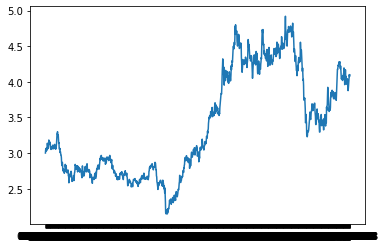

In [9]:
plt.plot(copper['Date'].values[::-1], copper['Open'].values[::-1])
plt.show()

## Histogram logarytmicznych przyrostów

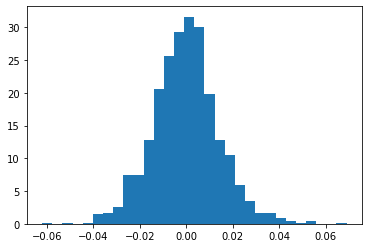

In [5]:
s = np.array(copper['Open'].values[1:])
s2 = np.array(copper['Open'].values[:-1])
r = np.log(s/s2)
plt.hist(r, bins = 30, density = True)
plt.show()

## Miary zmienności ryzyka

#### Podejście parametryczne

In [50]:
def norm_kde(x, mi, sigma):
    x = np.array(sorted(x))
    y = 1/(math.sqrt(2*math.pi)*sigma)*np.exp(-(x - mi)**2/(2*sigma**2))
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1) 
    plt.plot(x, y, color = 'blue', label = 'PDF')
    plt.hist(x, bins = 50, density = True, color = 'red', ec = 'black')
    sns.distplot(x, hist=False, label='poisson')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

In [51]:
mu = np.mean(r)
s = stdev(r)
print('Średnia: ' + str(mu))
print('Odchylenie standardowe: ' + str(s))

Średnia: -0.00024746377750914307
Odchylenie standardowe: 0.014277995279475233


c:\Users\Filip\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


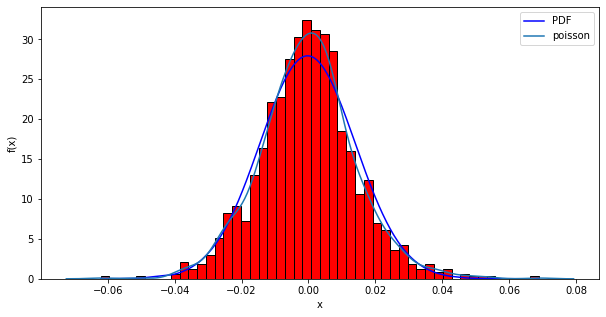

In [52]:
norm_kde(r, mu, s)

#### Podejście nieparametryczne

In [70]:
x = np.random.poisson(lam=0.2, size=10)

In [71]:
print(x)

[0 0 1 1 0 0 0 0 0 0]


In [40]:
aluminium = pd.read_csv('aluminium.csv', sep = ',', encoding = 'utf-8')
#aluminium['Date']

aluminium[aluminium['Date'] == None]

,Date,Open,High,Low,Close,Adj Close,Volume


In [41]:
aluminium[::-1]

,Date,Open,High,Low,Close,Adj Close,Volume
1234,2023-04-13,194.949997,197.899994,192.000000,194.899994,194.899994,24897
1233,2023-04-12,188.850006,197.699997,186.100006,192.100006,192.100006,18912
1232,2023-04-11,185.449997,189.949997,181.250000,186.649994,186.649994,13972
1231,2023-04-10,184.949997,186.300003,182.050003,185.449997,185.449997,14024
1230,2023-04-06,184.899994,184.899994,180.500000,182.300003,182.300003,15717
...,...,...,...,...,...,...,...
4,2018-04-20,78.199997,78.199997,73.550003,74.599998,69.847122,101320
3,2018-04-19,71.500000,78.449997,71.500000,78.449997,73.451828,212772
2,2018-04-18,71.900002,73.949997,70.824997,71.324997,66.780777,24882
1,2018-04-17,72.474998,73.349998,70.050003,71.250000,66.710564,24434


In [42]:
y = aluminium['Open']
#x = aluminium['Date']
#print(x)

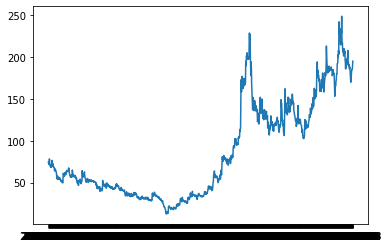

In [45]:
plt.plot(aluminium['Date'], aluminium['Open'])
plt.show()

# Analiza danych ropy i miedzi


In [2]:
copper = pd.read_csv('copper_fresh.csv', sep = ',', encoding = 'latin-1')
copper

,Date,Close/Last,Volume,Open,High,Low
0,04/14/2023,4.1065,98124,4.1285,4.1955,4.0950
1,04/13/2023,4.1240,88437,4.0700,4.1430,4.0535
2,04/12/2023,4.0810,88325,4.0295,4.0880,3.9840
3,04/11/2023,4.0195,81243,3.9870,4.0540,3.9780
4,04/10/2023,3.9765,53745,4.0180,4.0395,3.9630
...,...,...,...,...,...,...
1255,04/20/2018,3.1555,33960,3.1490,3.1685,3.1275
1256,04/19/2018,3.1540,37634,3.1835,3.2180,3.1350
1257,04/18/2018,3.1815,51721,3.1100,3.2015,3.0995
1258,04/17/2018,3.0795,88784,3.0835,3.1020,3.0545


In [4]:
crudeoil = pd.read_csv('crudeoil_fresh.csv', sep = ',', encoding = 'latin-1')
crudeoil

,Date,Close/Last,Volume,Open,High,Low
0,04/14/2023,82.52,243847,82.40,83.12,81.76
1,04/13/2023,82.16,233440,83.22,83.44,82.11
2,04/12/2023,83.26,323826,81.44,83.53,81.28
3,04/11/2023,81.53,282640,79.88,81.59,79.37
4,04/10/2023,79.74,238729,80.50,81.22,79.61
...,...,...,...,...,...,...
1255,04/20/2018,68.40,22739,68.26,68.62,67.50
1256,04/19/2018,68.29,89450,68.75,69.56,67.98
1257,04/18/2018,68.47,207210,66.68,68.91,66.56
1258,04/17/2018,66.52,472785,66.42,66.75,65.56


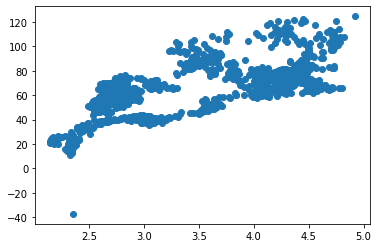

In [8]:
plt.scatter(copper['Open'].values[::-1],crudeoil['Open'].values[::-1])
plt.show()

In [12]:
korelacja = np.corrcoef(copper['Open'], crudeoil['Open'])
korelacja

array([[1.        , 0.66927312],
       [0.66927312, 1.        ]])